In [3]:
# Importing Various Libraries 

import pandas as pd
import numpy as np
import datetime as dt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
import math
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Importing Spending Data Set

SpendingData = pd.read_excel("Spending.xlsx")

In [5]:
SpendingData

,Details,Posting Date,Amount,Balance
0,DEBIT,2023-11-10,-36.20,580.44
1,DEBIT,2023-11-10,-150.00,616.64
2,DEBIT,2023-11-10,-100.00,766.64
3,DEBIT,2023-11-10,-30.00,866.64
4,DEBIT,2023-11-10,-600.00,896.64
...,...,...,...,...
970,CREDIT,2023-04-20,32.75,299.23
971,CREDIT,2023-04-20,100.00,266.48
972,CREDIT,2023-04-19,150.65,166.48
973,CREDIT,2023-04-19,3.24,15.83


In [6]:
# Converting 'Posting Date' column into Datetime and renaming as 'Date', then dropping 'Posting Date' from data frame

SpendingData['Date'] = pd.to_datetime(SpendingData['Posting Date'])
SpendingData.drop(['Posting Date'], axis=1, inplace=True)
SpendingData = SpendingData.sort_values(by='Date', ascending=True)
SpendingData2 = SpendingData

In [7]:
# Splitting dataset into Credits (income) and Debits (spending)

Credit = SpendingData[SpendingData['Details'] == 'CREDIT']
Debit = SpendingData[SpendingData['Details'] == 'DEBIT']
Debit['Amount'] = Debit['Amount'].abs()

In [8]:
Credit.head()

,Details,Amount,Balance,Date
974,CREDIT,12.59,12.59,2023-04-19
973,CREDIT,3.24,15.83,2023-04-19
972,CREDIT,150.65,166.48,2023-04-19
971,CREDIT,100.00,266.48,2023-04-20
970,CREDIT,32.75,299.23,2023-04-20


In [9]:
Debit.head()

,Details,Amount,Balance,Date
969,DEBIT,21.00,278.23,2023-04-20
968,DEBIT,1.00,277.23,2023-04-21
966,DEBIT,115.52,125.70,2023-04-24
959,DEBIT,24.28,6.07,2023-04-24
960,DEBIT,7.99,30.35,2023-04-24


<BarContainer object of 900 artists>

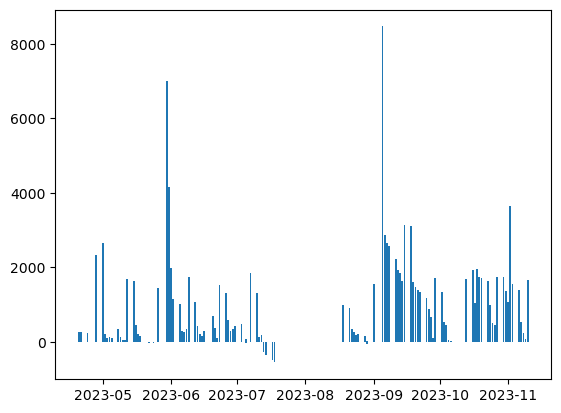

In [10]:
# Plotting Debits from dataset

plt.bar(Debit['Date'], Debit['Balance'])

<BarContainer object of 74 artists>

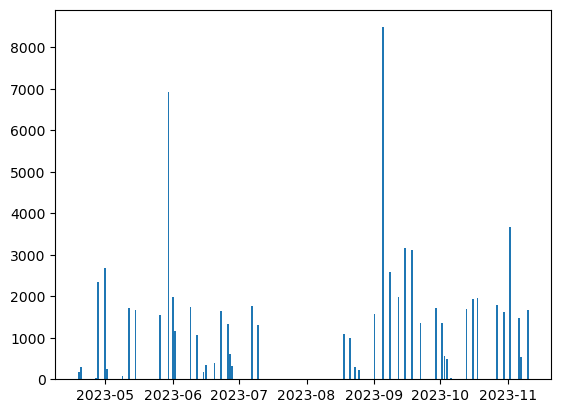

In [11]:
# Plotting Credits from dataset

plt.bar(Credit['Date'], Credit['Balance'])

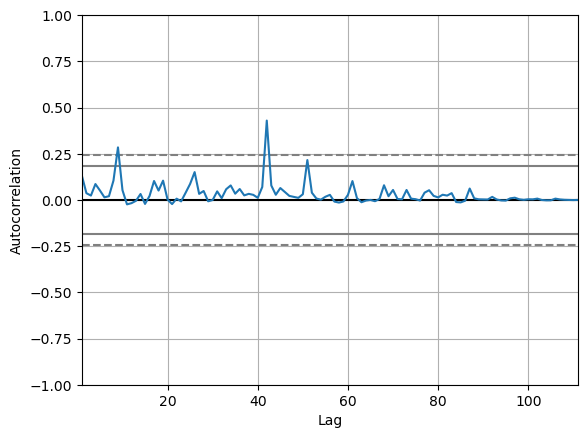

In [12]:
# Autocorrelation grapgh for Debits

DebitData = Debit.groupby('Date').sum('Amount')
DebitData.describe()
autocorrelation_plot(DebitData)
plt.show()

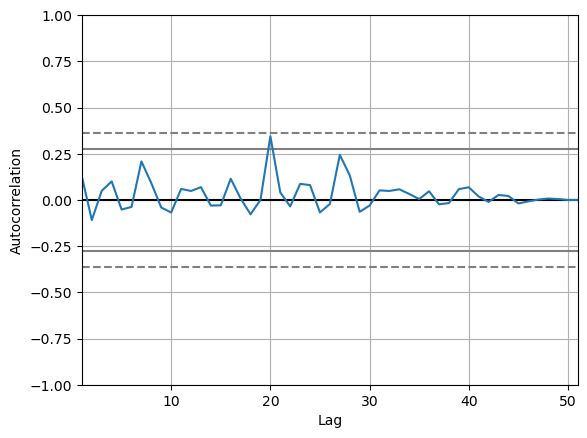

In [13]:
# Autocorrelation graph for Credits

CreditData = Credit.groupby('Date').sum('Amount')
autocorrelation_plot(CreditData)
plt.show()

In [14]:
# Creation of ARIMA models for Debits and Credits

Spending = ARIMA(DebitData.Amount, order=(3,1,0))
SpendingFit = Spending.fit()

Income = ARIMA(CreditData.Amount, order=(3,1,0))
IncomeFit = Income.fit()

In [15]:
print(SpendingFit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Amount   No. Observations:                  111
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -896.356
Date:                Wed, 15 Nov 2023   AIC                           1800.713
Time:                        14:47:40   BIC                           1811.515
Sample:                             0   HQIC                          1805.094
                                - 111                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6199      0.057    -10.866      0.000      -0.732      -0.508
ar.L2         -0.4214      0.098     -4.303      0.000      -0.613      -0.229
ar.L3         -0.2187      0.090     -2.430      0.0

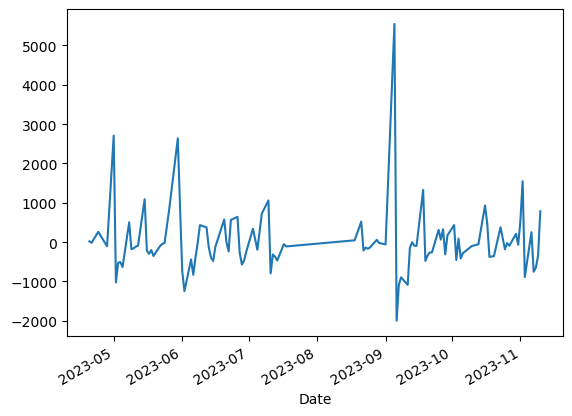

In [16]:
residuals = SpendingFit.resid
residuals.plot()
plt.show()

In [17]:
print(IncomeFit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Amount   No. Observations:                   51
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -440.466
Date:                Wed, 15 Nov 2023   AIC                            888.931
Time:                        14:47:41   BIC                            896.580
Sample:                             0   HQIC                           891.844
                                 - 51                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7475      0.139     -5.381      0.000      -1.020      -0.475
ar.L2         -0.6083      0.170     -3.585      0.000      -0.941      -0.276
ar.L3         -0.2190      0.137     -1.594      0.1

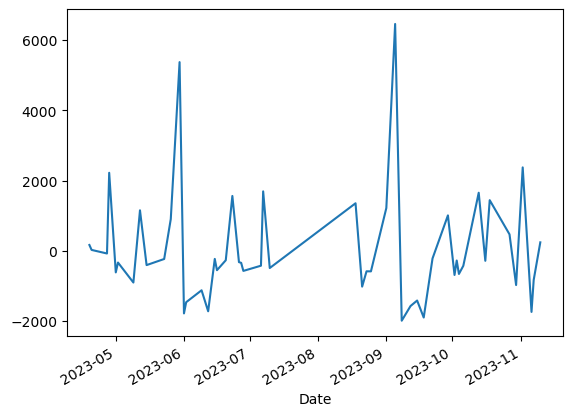

In [18]:
residuals = IncomeFit.resid
residuals.plot()
plt.show()

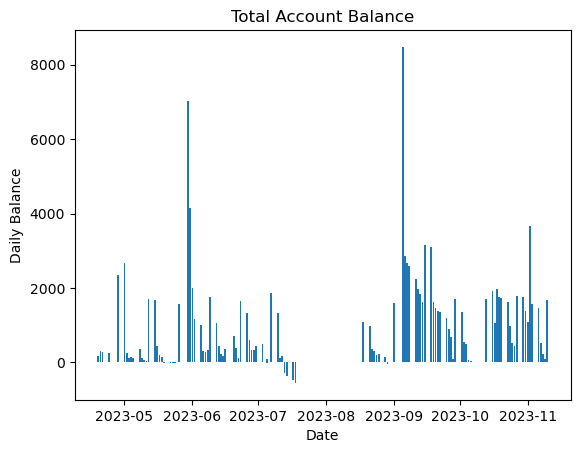

In [19]:
plt.bar(SpendingData2['Date'], SpendingData2['Balance'])
plt.title("Total Account Balance")
plt.xlabel("Date")
plt.ylabel("Daily Balance")
plt.show()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

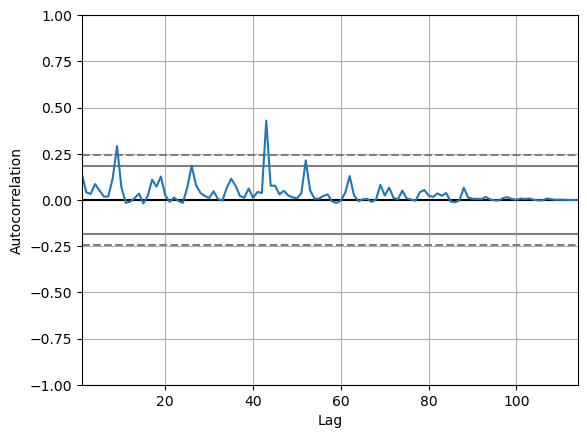

In [20]:
Spending2 = SpendingData2.groupby('Date').sum('Balance')
Spending2.describe()
autocorrelation_plot(Spending2)

In [21]:
S2 = ARIMA(Spending2.Balance, order=(3,1,0))
S2Model = S2.fit()

In [22]:
print(S2Model.summary())

                               SARIMAX Results                                
Dep. Variable:                Balance   No. Observations:                  114
Model:                 ARIMA(3, 1, 0)   Log Likelihood               -1329.391
Date:                Wed, 15 Nov 2023   AIC                           2666.782
Time:                        14:47:41   BIC                           2677.692
Sample:                             0   HQIC                          2671.209
                                - 114                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6646      0.068     -9.816      0.000      -0.797      -0.532
ar.L2         -0.4662      0.088     -5.304      0.000      -0.639      -0.294
ar.L3         -0.2751      0.074     -3.708      0.0

In [23]:
Credit['Date']

974   2023-04-19
973   2023-04-19
972   2023-04-19
971   2023-04-20
970   2023-04-20
         ...    
98    2023-10-30
64    2023-11-02
50    2023-11-06
25    2023-11-07
17    2023-11-10
Name: Date, Length: 74, dtype: datetime64[ns]

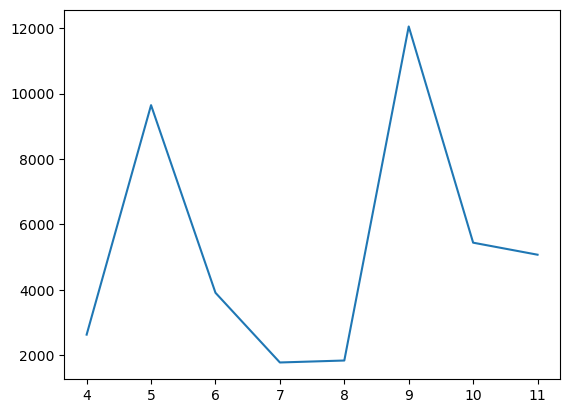

In [31]:
CreditGrouped = Credit.groupby(Credit.Date.dt.month)['Amount'].sum()
CreditGrouped
plt.plot(CreditGrouped)

In [27]:
DebitGrouped = Debit.groupby(Debit.Date.dt.month)['Amount'].sum()
DebitGrouped

Date
4       308.22
5     11767.26
6      9661.82
7      4176.02
8      1351.07
9     11036.88
10     6048.82
11     5675.45
Name: Amount, dtype: float64

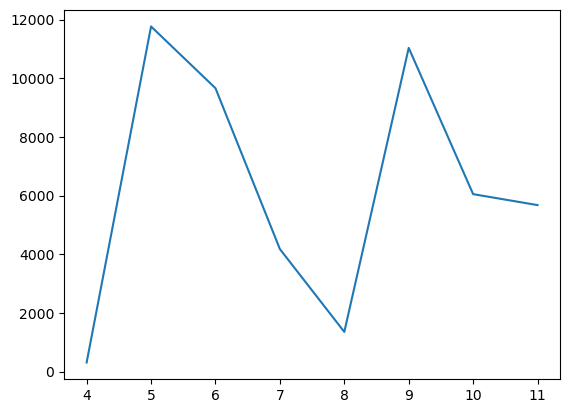

In [30]:
plt.plot(DebitGrouped)